# Binary Handwritten Digit Recognition
---

### Problem Statement

The objective of this project is to develop a robust machine learning model capable of accurately recognizing and classifying handwritten digits as either 0 (zero) or 1 (one) from image data. This is a binary classification task, where the model must learn to distinguish between the two digit classes based on the provided training examples, being able to extract relevant features from the input images and learn the underlying patterns that differentiate between the two digit classes. 

### 1. Import Python libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
#from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)


### 2. Import Dataset

In [2]:
# load dataset
# --------------------------------------
# The data set contains 8817 training examples of handwritten digits, limited to zero and one.
# Each training example is a 28-pixel x 28-pixel grayscale image of the digit.
# Each pixel is represented by a floating-point number indicating the grayscale intensity at that location.
# The 28 by 28 grid of pixels is “unrolled” into a 784-dimensional vector.
# Each training example becomes a single row in our data matrix X.

# This gives us a 8817 x 784 matrix X where every row is a training example of a handwritten digit image.

data = np.genfromtxt('./dataset/digitRecognition.csv', delimiter = ',')
data = np.delete(data, 0, 0)

X = data[:, 1:] # 784-dimensional vector
y = data[:, 0].astype('int32') # lebels

In [3]:
print ('The first element of X is: ', X[0])

The first element of X is:  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  18.  30. 137. 137.
 192.  86.  72.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  13.  86. 250. 254. 254. 254.
 254. 217. 246. 151.  32.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.  16. 179. 254. 254. 254. 254. 254.
 254. 254. 254. 254. 231.  54.  15.   0.   0.   0

In [4]:
print ('The first element of y is: ', y[0])
print ('The last element of y is: ', y[-1])

The first element of y is:  0
The last element of y is:  1


In [5]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (8816, 784)
The shape of y is: (8816,)


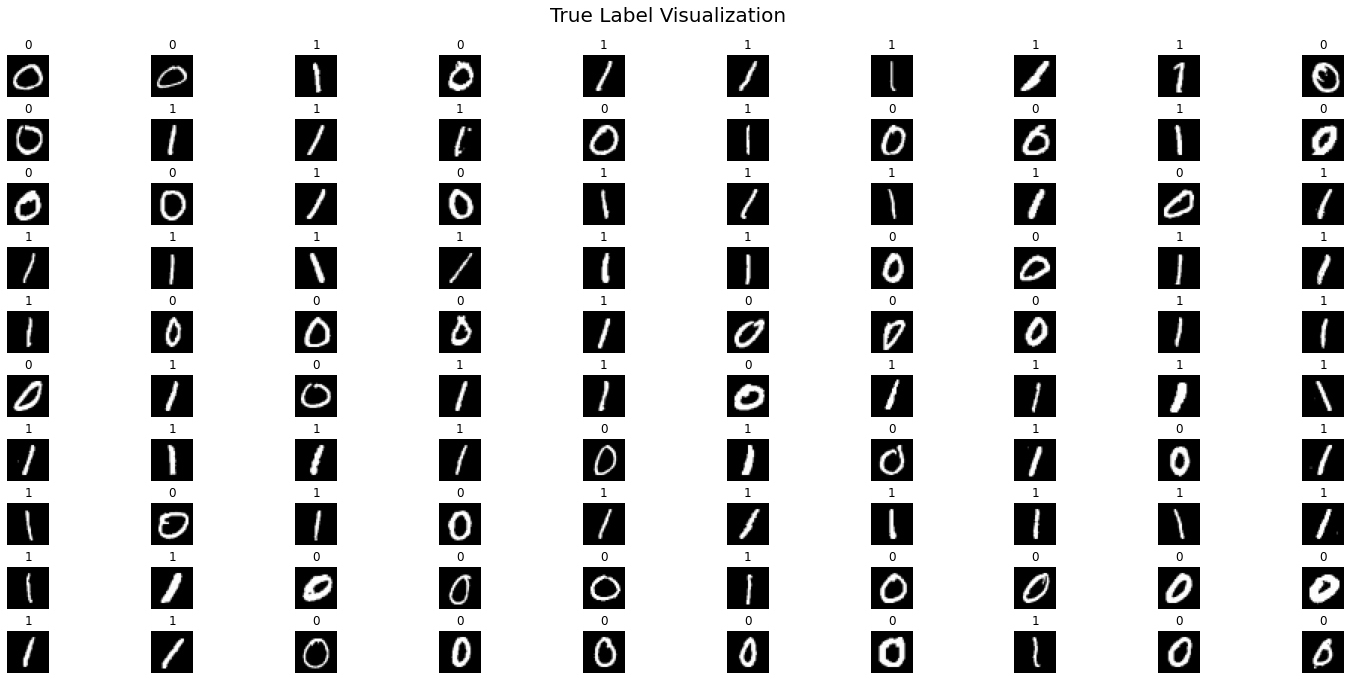

In [6]:
#  Visualizing the Data
# --------------------------------------

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(10, 10, figsize=(20,10))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index])
    ax.set_axis_off()

fig.suptitle("True Label Visualization", fontsize = 20)
plt.show()

### 3. Data Preprocessing

In [7]:
# train_test_split
# --------------------------------------
# Split arrays or matrices into random train and test subsets.
# More info: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 13 )

print("train_test_split")
print("--------------------------------------")
print("Train -> X_train : " + str(X_train.shape) + " | y_train : " + str(y_train.shape))
print("Test  -> X_test  : " + str(X_test.shape) + " | y_test  : " + str(y_test.shape))

train_test_split
--------------------------------------
Train -> X_train : (6612, 784) | y_train : (6612,)
Test  -> X_test  : (2204, 784) | y_test  : (2204,)


### 4. Model Building, Training & Testing

Tensorflow models are built layer by layer. A layer's input dimensions ( 𝑠𝑖𝑛  above) are calculated for you. 
You specify a layer's output dimensions and this determines the next layer's input dimension. The input 
dimension of the first layer is derived from the size of the input data specified in the model.fit statement below.

In [8]:

# Sequential, Dense
# --------------------------------------
# Sequential: suitable for analysis and comparison of simple neural network-oriented models which comprises 
# layers and their associated data using top to bottom flow.
# Dense: Keras dense is one of the widely used layers inside the keras model or neural network where 
# all the connections are made very deeply. In other words, the neurons in the dense layer get their 
# source of input data from all the other neurons of the previous layer of the network.

model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),    #specify input size
        ### START CODE HERE ### 
        Dense(25, activation = 'sigmoid'),
        Dense(15, activation = 'sigmoid'),
        Dense(1,  activation = 'sigmoid')
        ### END CODE HERE ### 
    ], name = "my_model" 
)                            


In [9]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                19625     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 20,031
Trainable params: 20,031
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Model.compile
# --------------------------------------
# Defines the loss function, the optimizer and the metrics.
# BinaryCrossentropy: Binary cross entropy compares each of the predicted probabilities to 
# actual class output which can be either 0 or 1. It then calculates the score that penalizes 
# the probabilities based on the distance from the expected value. That means how close or far 
# from the actual value.
# Adam Optimizier: Adam is a stochastic gradient descent optimizer that works on adaptive estimations. 
# Gradient descent is useful in adjusting the weights in hidden layers.

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train, y_train,
    epochs = 20
)

Epoch 1/20
207/207 [==============================] - 1s 1ms/step - loss: 0.2321
Epoch 2/20
207/207 [==============================] - 0s 1ms/step - loss: 0.0484
Epoch 3/20
207/207 [==============================] - 0s 1ms/step - loss: 0.0242
Epoch 4/20
207/207 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 5/20
207/207 [==============================] - 0s 1ms/step - loss: 0.0114
Epoch 6/20
207/207 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 7/20
207/207 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 8/20
207/207 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 9/20
207/207 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 10/20
207/207 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 11/20
207/207 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 12/20
207/207 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 13/20
207/207 [====

In [11]:
# Testing predictions
# --------------------------------------
# The output of the model is interpreted as a probability of the input being a 1 or 0
# A result figure closer to one is indicates the number is 1

prediction = model.predict(X_train[6611].reshape(1,784))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X_train[0].reshape(1,784))  # a one
print(f" predicting a one:  {prediction}")

1/1 [==============================] - 0s 65ms/step
 predicting a zero: [[0.0004713]]
1/1 [==============================] - 0s 18ms/step
 predicting a one:  [[0.99923605]]


In [12]:
# threshold
# --------------------------------------
# The probability is compared to a threshold to make a final prediction.

if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
    
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


1/1 [==============================] - 0s 18ms/step


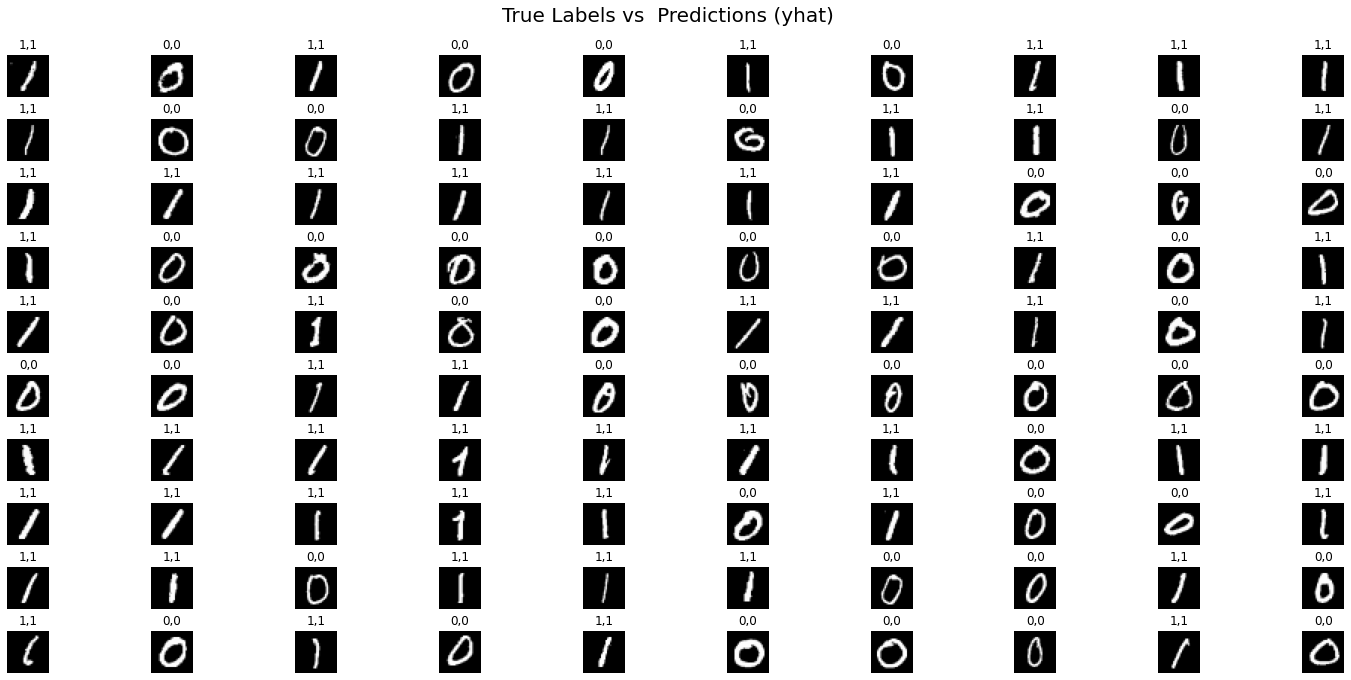

In [13]:
#  Testing model on Test data & Visualizing results
# --------------------------------------

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X_test.shape

fig, axes = plt.subplots(10,10, figsize=(20,10))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_test[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X_test[random_index].reshape(1,784))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y_test[random_index]},{yhat}")
    ax.set_axis_off()
fig.suptitle("True Labels vs  Predictions (yhat)", fontsize = 20)
fig.savefig('./imgs/predictions_plt.jpg')
plt.show()

### 5. Model Performance Evaluation

In [14]:
# model performance evaluation
def model_Performance(model):
    
    # Training and testing prediction
    pred_train = model.predict(X_train)
    pred_test  = model.predict(X_test)

    #applying threshold:
    pred_train = np.where(pred_train < 0.5, 0, 1)
    pred_test  = np.where(pred_test < 0.5, 0, 1)
       
    # Accuracy score
    # The accuracy_score function computes the accuracy, either the fraction (default) 
    # or the count (normalize=False) of correct predictions. In multilabel classification, 
    # the function returns the subset accuracy. If the entire set of predicted labels for a 
    # sample strictly match with the true set of labels, then the subset accuracy is 1.0; 
    # otherwise it is 0.0.
    
    as_train = metrics.accuracy_score(y_train, pred_train)  
    as_test  = metrics.accuracy_score(y_test, pred_test)

    # F1 score
    # Also known as balanced F-score or F-measure. can be interpreted as a harmonic mean of the precision and 
    # recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative 
    # contribution of precision and recall to the F1 score are equal.
    
    f1_train = metrics.f1_score(y_train, pred_train)
    f1_test  = metrics.f1_score(y_test, pred_test)

    # Precision Score 
    # The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp 
    # the number of false positives. The precision is intuitively the ability of the classifier 
    # not to label as positive a sample that is negative. 
    # The best value is 1 and the worst value is 0.

    ps_train = metrics.precision_score(y_train, pred_train)
    ps_test  = metrics.precision_score(y_test, pred_test)

    # Recall Score 
    # The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn 
    # the number of false negatives. The recall is intuitively the ability of the classifier 
    # to find all the positive samples. 
    # The best value is 1 and the worst value is 0.

    re_train = metrics.recall_score(y_train, pred_train)
    re_test  = metrics.recall_score(y_test, pred_test)


    # printing performance matrics
    print('Model Perfromance: ' + str(model))
    print("--------------------------------------")
    print("Train data set ->  Accuracy: %0.3f   |   F1 score: %0.3f    |    Precision: %0.3f    |   Recall: %0.3f" % (as_train, f1_train, ps_train, re_train))
    print("Test data set  ->  Accuracy: %0.3f   |   F1 score: %0.3f    |    Precision: %0.3f    |   Recall: %0.3f" % (as_test, f1_test, ps_test, re_test))


In [15]:
model_Performance(model)

69/69 [==============================] - 0s 824us/step
Model Perfromance: <keras.engine.sequential.Sequential object at 0x000001B83D885AE0>
--------------------------------------
Train data set ->  Accuracy: 0.999   |   F1 score: 0.999    |    Precision: 0.999    |   Recall: 1.000
Test data set  ->  Accuracy: 0.999   |   F1 score: 0.999    |    Precision: 0.999    |   Recall: 0.998


In [16]:
# Training and testing prediction
pred_train = model.predict(X_train)
pred_test  = model.predict(X_test)

# applying threshold:
pred_train_threshold = np.where(pred_train < 0.5, 0, 1)
pred_test_threshold  = np.where(pred_test < 0.5, 0, 1)

69/69 [==============================] - 0s 797us/step


In [17]:
# Confusion Matrix on Train dataset
confusion_matrix = metrics.confusion_matrix(y_train, pred_train_threshold)
confusion_matrix

array([[3072,    3],
       [   1, 3536]], dtype=int64)

In [18]:
# Confusion Matrix on Test dataset
confusion_matrix = metrics.confusion_matrix(y_test, pred_test_threshold)
confusion_matrix


array([[1056,    1],
       [   2, 1145]], dtype=int64)